# First create a DataFrame of 3D. Then using principle Component Analysis (PCA) technique make the DataFrame to 2D. Plot the graphs

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(23)

# Define mean and covariance matrix for the first class
mu_vec1 = np.array([0, 0, 0])
cov_matrix1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Generate 20 samples for the first class
class1_sample = np.random.multivariate_normal(mu_vec1, cov_matrix1, 20)

# Create a DataFrame for the first class with columns named feature1, feature2, feature3
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])

# Assign a target value of 1 to indicate the first class
df['target'] = 1

# Define mean and covariance matrix for the second class
mu_vec2 = np.array([1, 1, 1])
cov_matrix2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Generate 20 samples for the second class
class2_sample = np.random.multivariate_normal(mu_vec2, cov_matrix2, 20)

# Create a DataFrame for the second class with columns named feature1, feature2, feature3
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])

# Assign a target value of 0 to indicate the second class
df1['target'] = 0

# Concatenate both DataFrames vertically with ignore_index set to True
df = pd.concat([df, df1], ignore_index=True)

# Sample 40 rows from the concatenated DataFrame
df = df.sample(40)

# Display the first few rows of the resulting DataFrame
df.head()


,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [8]:
import plotly.express as px


fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3', color='target',
                    labels={'feature1': 'Feature 1', 'feature2': 'Feature 2', 'feature3': 'Feature 3', 'target': 'Target'})

fig.update_layout(title='3D Scatter Plot of DataFrame', autosize=False, width=800, height=600)
fig.show()


In [10]:
#Apply Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

In [11]:
#Find Covariance Matrix

covariance_matrix = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print('Covariance Matrix: \n', covariance_matrix)

Covariance Matrix: 
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [12]:
#Find Eigen values and eigen vectors

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [13]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [14]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

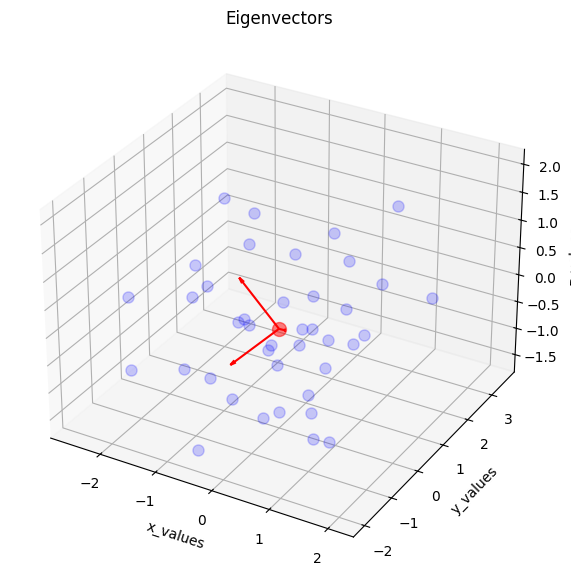

In [20]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting data points
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)

# Plotting eigenvectors
for v in eigen_vectors.T:
    ax.quiver(df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean(), v[0], v[1], v[2], color='red', arrow_length_ratio=0.1)

# Setting labels and title
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')

plt.show()


In [21]:
pc = eigen_vectors[0:2] # selecting the first two eigenvectors 
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [24]:
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)   #matrix multiplication of the selected data df.iloc[:, 0:3] with pc.T   i.e. transpose of pc.
                                                #np.dot() used to do matrix multiplication

new_df = pd.DataFrame(transformed_df , columns= ['PC1', 'PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


# Visualization using plotly

In [31]:
# DataFrame with columns 'PC1', 'PC2', and 'target'

new_df['target'] = new_df['target'].astype('str')  # Converting 'target' column to string type

fig = px.scatter(x=new_df['PC1'],  # x-axis values from 'PC1'
                 y=new_df['PC2'],  # y-axis values from 'PC2'
                 color=new_df['target'],  # Color based on 'target' column
                 color_discrete_sequence=px.colors.qualitative.G10  # Setting color scheme
                )

fig.update_traces(marker=dict(size=12,  # Setting marker size
                              line=dict(width=2, color='DarkSlateGrey')),  # Marker line properties
                  selector=dict(mode='markers'))  # Selecting mode for updating traces

fig.show()  # Display the plot